In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import requests
from io import BytesIO
import pandas as pd

In [2]:
response = requests.get("http://sipi.usc.edu/database/download.php?vol=misc&img=4.1.08")
img = Image.open(BytesIO(response.content))
X = np.array(img)
X2 = X

In [3]:
X = X.reshape(-1,3)

In [4]:
X.shape

(65536, 3)

In [5]:
def eq(X,Y):
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if(X[i,j]!=Y[i,j]):
                return False
    return True

In [6]:
def K_Means(X,K , maxiter = 15):
    N,D = X.shape
    Mu = X[np.random.randint(0,N,size = K)]
    Cluster = np.zeros(N,dtype=np.int)
    for _ in range(int(maxiter)):
        for i in range(N):
            Error = 1e9
            for j in range(K):
                e = np.sum((X[i] - Mu[j])**2)
                if(e<Error):
                    Cluster[i] = j
                    Error = e
            
        Mu2 = np.zeros((K,D))
        count = np.zeros(K)
        
        for i in range(N):
            temp = int(Cluster[i])
            Mu2[temp]= X[i] + Mu2[temp]
            count[temp]+=1
        for i in range(K):
            if(count[i]!=0):
                Mu2[i] = Mu2[i]/count[i]
        Variance = np.mean(np.sum((X-Mu2[Cluster])**2,axis=1))
        print("iteration :", _ , "Error : , ",Variance)   
        if(eq(Mu,Mu2)):
            return Cluster , Mu
        Mu = Mu2[:]
            
    return Cluster , Mu

In [7]:
K=3
cmap = plt.cm.get_cmap('hsv', K)
Cluster , Mu = K_Means(X,K)

iteration : 0 Error : ,  5862.798053830785
iteration : 1 Error : ,  2121.6217657705815
iteration : 2 Error : ,  1439.8379211812749
iteration : 3 Error : ,  1372.3687692197184
iteration : 4 Error : ,  1343.4847382032478
iteration : 5 Error : ,  1322.8085213499419
iteration : 6 Error : ,  1308.3998346600647
iteration : 7 Error : ,  1299.8350332290145
iteration : 8 Error : ,  1295.6287444223328
iteration : 9 Error : ,  1293.6760190924706
iteration : 10 Error : ,  1292.8316145201625
iteration : 11 Error : ,  1292.50837832277
iteration : 12 Error : ,  1292.3245604061728
iteration : 13 Error : ,  1292.239011405306
iteration : 14 Error : ,  1292.2098638147


In [8]:
color = np.array([[256,0,0], [0,256,0],[0,0,256],[256,256,0],[256,0,256]])
Y = Mu[Cluster]
Y = Y.reshape(256,256,-1)
Y = np.array(Y,dtype = np.uint8)

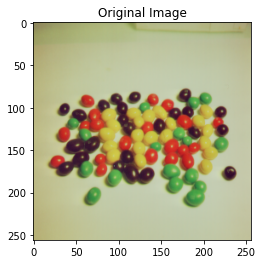

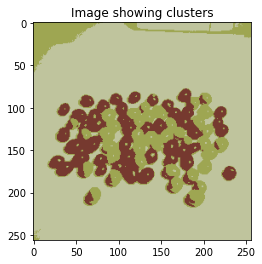

In [9]:
plt.title("Original Image")
plt.imshow(X2)
plt.show()
plt.title("Image showing clusters")
plt.imshow(Y)
plt.show()

In [10]:
print("Coordinates of Centroid")
for i in Mu:
    print(i)

Coordinates of Centroid
[191.04951072 196.23337887 157.04601742]
[118.48137265  57.49585476  47.95602896]
[158.71110132 166.23770925  82.91762115]


# PRINCIPLE COMPONENT ANALYSIS

In [11]:
def PCA(X,n=2):
    mean = np.mean(X, axis = 0)
    X_std = (X - mean)
    cov_mat = np.dot(X_std.T , X_std)/(X.shape[0]-1)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    eig_sorted = np.argsort(-eig_vals)
    X_std_pca = X_std.dot(eig_vecs[:,eig_sorted[:n]])
    return X_std_pca,eig_vals[eig_sorted[:n]]

In [12]:
y,eigen = PCA(X,3)

In [13]:
Cyy = np.dot(y.T , y)/(X.shape[0]-1)

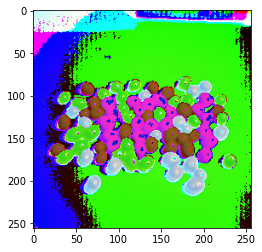

In [14]:
y = y.reshape(256,256,-1)
y = np.array(y , dtype = np.uint8)
plt.imshow(y)

In [15]:
print("Cyy Matrix of output")
Cyy

Cyy Matrix of output


array([[ 5.12825264e+03, -2.01175482e-13, -7.22211098e-14],
       [-2.01175482e-13,  6.74584932e+02,  1.00993672e-13],
       [-7.22211098e-14,  1.00993672e-13,  3.44748287e+02]])

In [16]:
print("Eigen Values")
eigen

Eigen Values


array([5128.25263587,  674.58493242,  344.74828693])

1. Eigen Values of covariance of X are present in the covariance of PCA output (Cyy). This confirms that algorithm is working as expected.

Drawbacks of PCA
1. PCA represents data in lower dimensional by removing the redundant features. It achieves that through finding orthogonal principal components. We use a covariance matrix to find the principal components. The only one distribution which allows us to represent the whole data in a compact form is Gaussian distribution. Hence PCA doesn't work that well when distribution is other than Gaussian.
2. PCA considers low variance components as noise which may not always be true



# MAXIMUM LIKELIHOOD ESTMATION

In [17]:
def mle(x , dist = 'Binomial'):
    
    
    if  dist == 'Binomial':
        p = np.mean(x)/x.shape[0]
        return np.random.binomial(x.shape[0],p,size = x.shape)
        
    elif dist == 'Poisson':
        Lamda = np.mean(x)
        return np.random.poisson(Lamda , size = x.shape)

    elif dist == 'Exponential':
        Lamda = np.mean(x)
        return np.random.exponential(Lamda , size = x.shape)        
        
    elif dist == 'Gaussian':
        mu = np.mean(x)
        sigma = np.mean((x-mu)**2)
        return np.random.normal(mu,np.sqrt(sigma) , size = x.shape)    
        
    elif dist == 'Laplacian':
        mu = np.median(x)
        beta = np.mean(np.abs(x-mu))
        return np.random.laplace(mu,beta , size = x.shape)
       

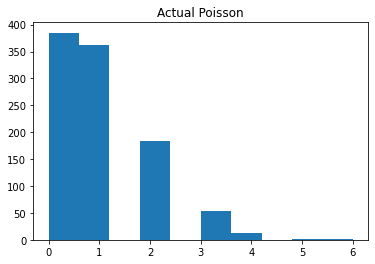

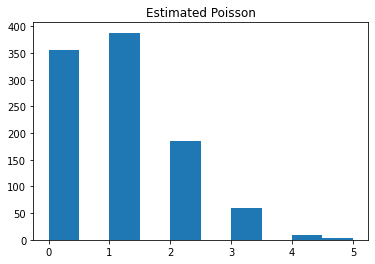

In [18]:
x = np.random.poisson(size = (1000))
plt.title("Actual Poisson")
plt.hist(x)
plt.show()
plt.title("Estimated Poisson")
plt.hist(mle(x,'Poisson'))
plt.show()

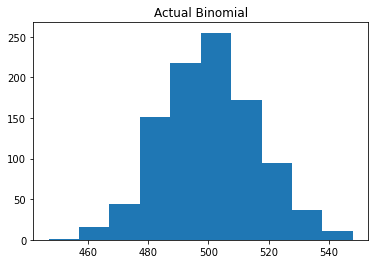

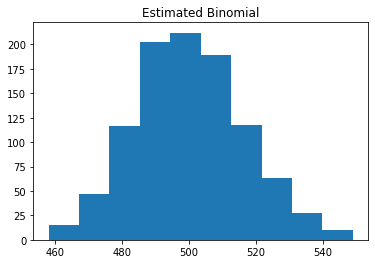

In [19]:
x = np.random.binomial(1000,0.5,size = (1000))
plt.title("Actual Binomial")
plt.hist(x)
plt.show()
plt.title("Estimated Binomial")
plt.hist(mle(x,'Binomial'))
plt.show()

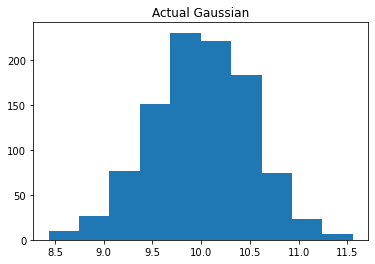

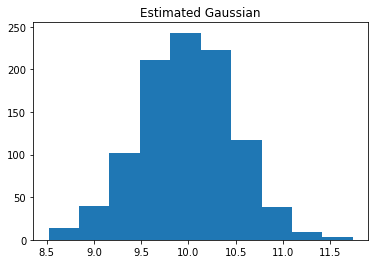

In [20]:
x = np.random.normal(10,0.5,size = (1000))
plt.title("Actual Gaussian")
plt.hist(x)
plt.show()
plt.title("Estimated Gaussian")
plt.hist(mle(x,'Gaussian'))
plt.show()

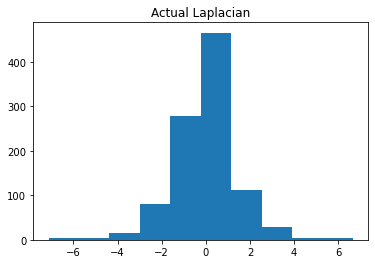

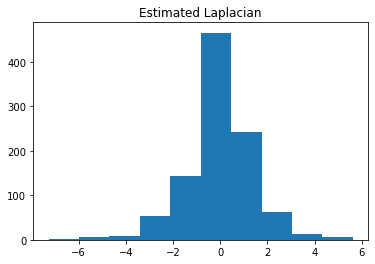

In [21]:
x = np.random.laplace(size = (1000))
plt.title("Actual Laplacian")
plt.hist(x)
plt.show()
plt.title("Estimated Laplacian")
plt.hist(mle(x,'Laplacian'))
plt.show()

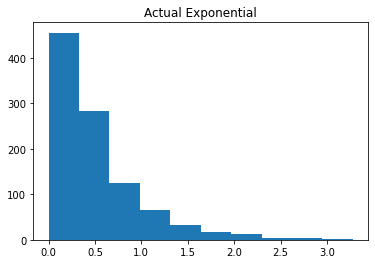

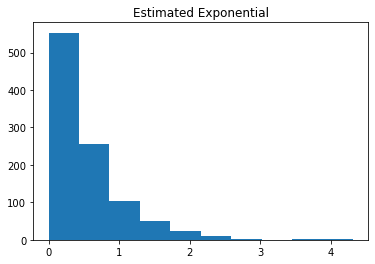

In [22]:
x = np.random.exponential(0.5, size = (1000))
plt.title("Actual Exponential")
plt.hist(x)
plt.show()
plt.title("Estimated Exponential")
plt.hist(mle(x,'Exponential'))
plt.show()

As number of samples increases the estimation improves.